In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# loading data

#IF1
data1=r"data\phenotype_translating_result_IF1.tsv"
df1=pd.read_csv(data1, sep='\t')
df1.drop(columns=df1.columns[0], axis=1, inplace=True) # first column is id number

#IF2
data2=r"data\phenotype_translating_result_IF2.tsv"
df2=pd.read_csv(data2, sep='\t')
df2.drop(columns=df2.columns[0], axis=1, inplace=True)

#IF3
data3=r"data\phenotype_translating_result_IF3.tsv"
df3=pd.read_csv(data3, sep='\t')
df3.drop(columns=df3.columns[0], axis=1, inplace=True)

In [3]:
def boxplots(data, type, name): # type is either 'cell type' or 'signature'; name is plot name
    long_data=pd.melt(data, id_vars=['patient'], var_name=type, value_name='Count')

    pd.plotting.boxplot(long_data, column='Count', by=type, figsize=(12, 6))
    plt.title(name)
    plt.xticks(rotation=45)

    plt.ylabel('Count')
    plt.show()

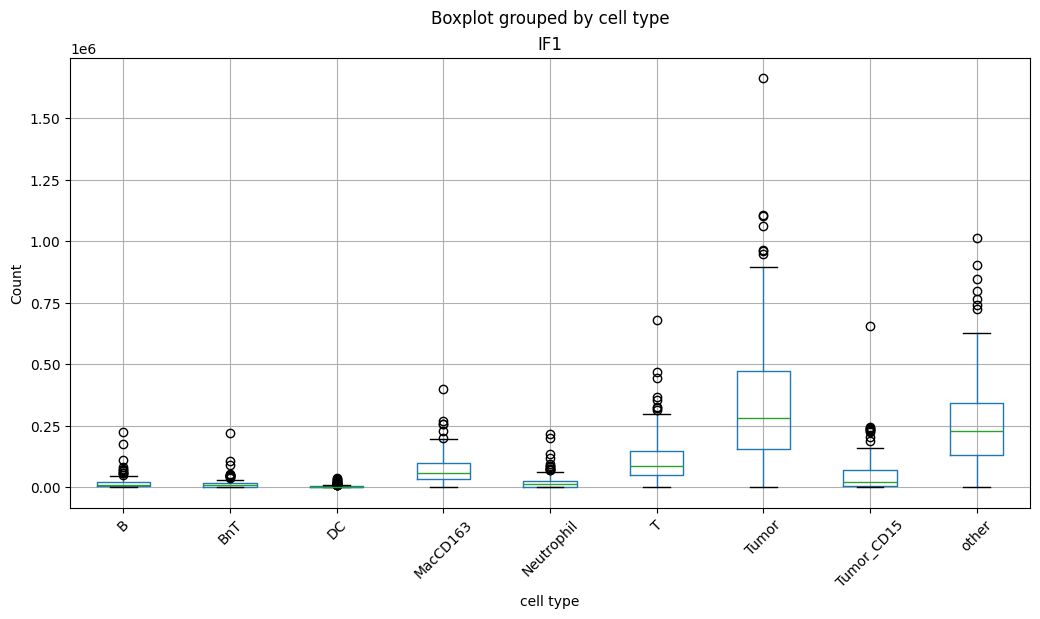

In [5]:
boxplots(df1, "cell type", "IF1")

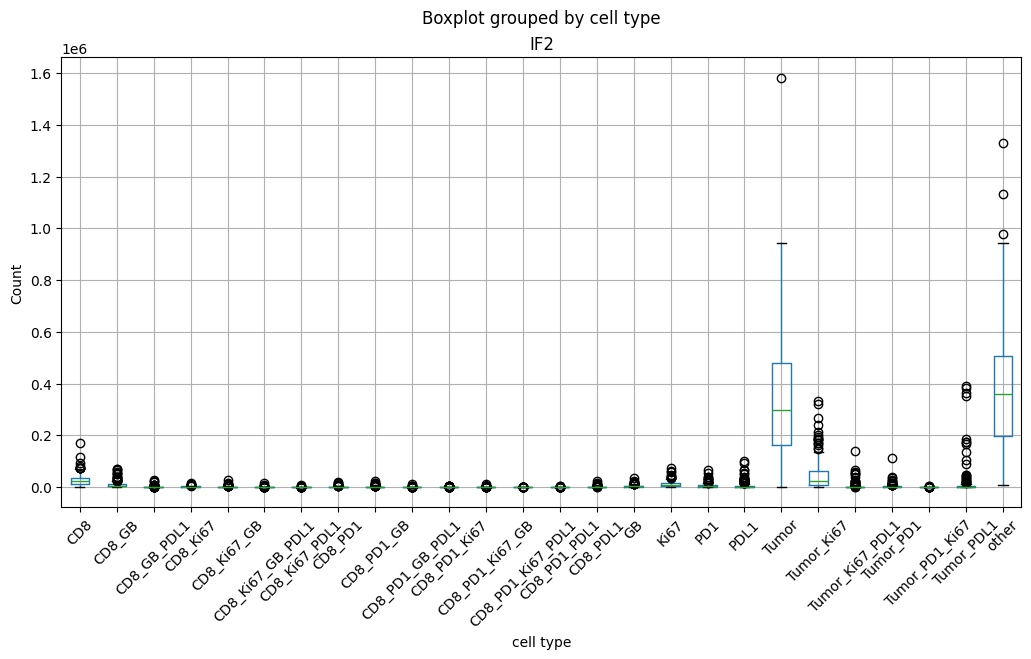

In [4]:
boxplots(df2, "cell type", "IF2")

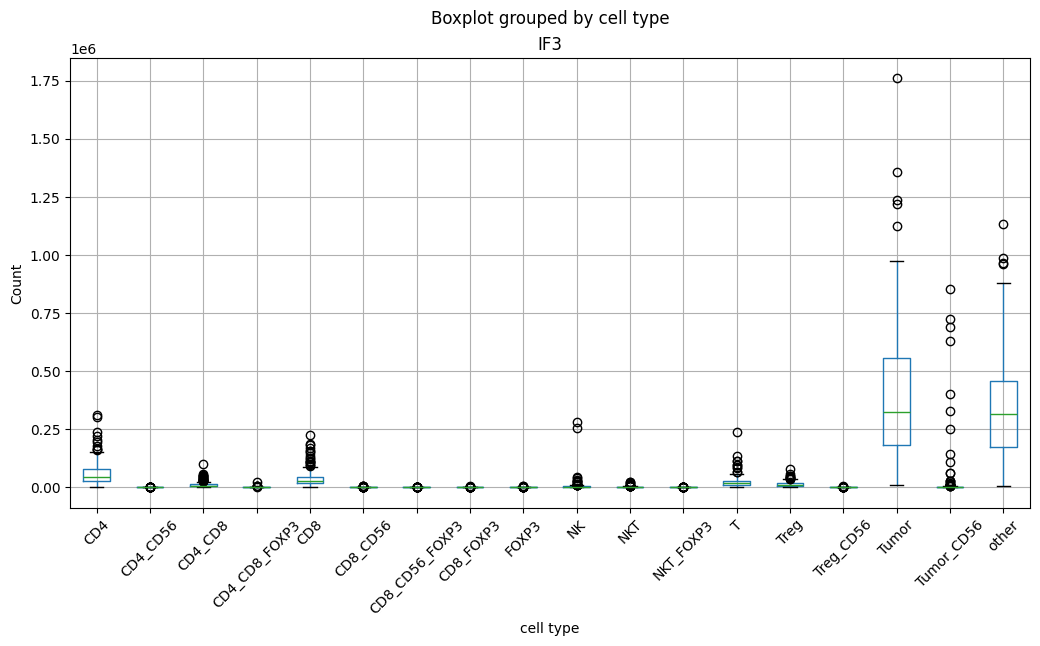

In [7]:
boxplots(df3, "cell type", "IF3")

### Without tumor cells or 'other'

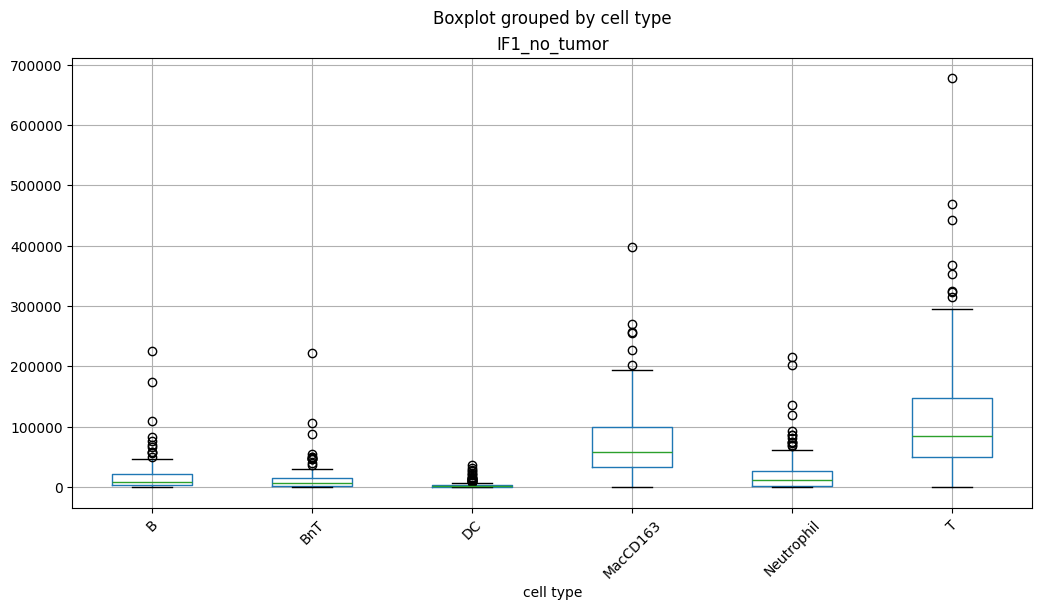

In [6]:
df1_edit=df1.drop(columns=[col for col in df1.columns if col.startswith('Tumor')])
df1_edit=df1_edit.drop(columns=['other'])
boxplots(df1_edit, "cell type", "IF1_no_tumor")

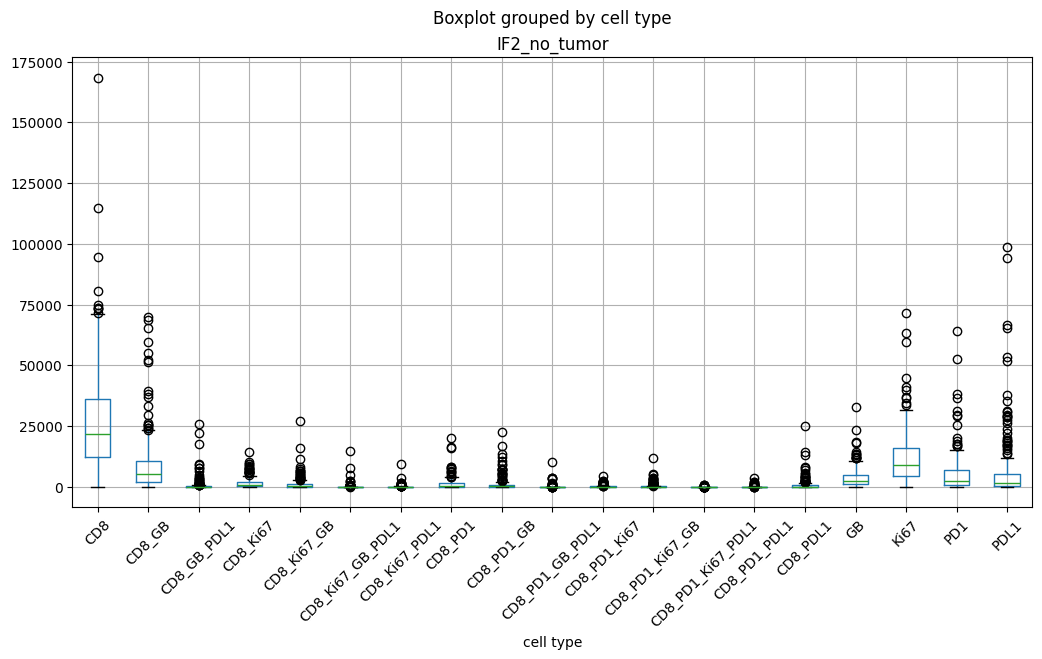

In [7]:
df2_edit=df2.drop(columns=[col for col in df2.columns if col.startswith('Tumor')])
df2_edit=df2_edit.drop(columns=['other'])
boxplots(df2_edit, "cell type", "IF2_no_tumor")

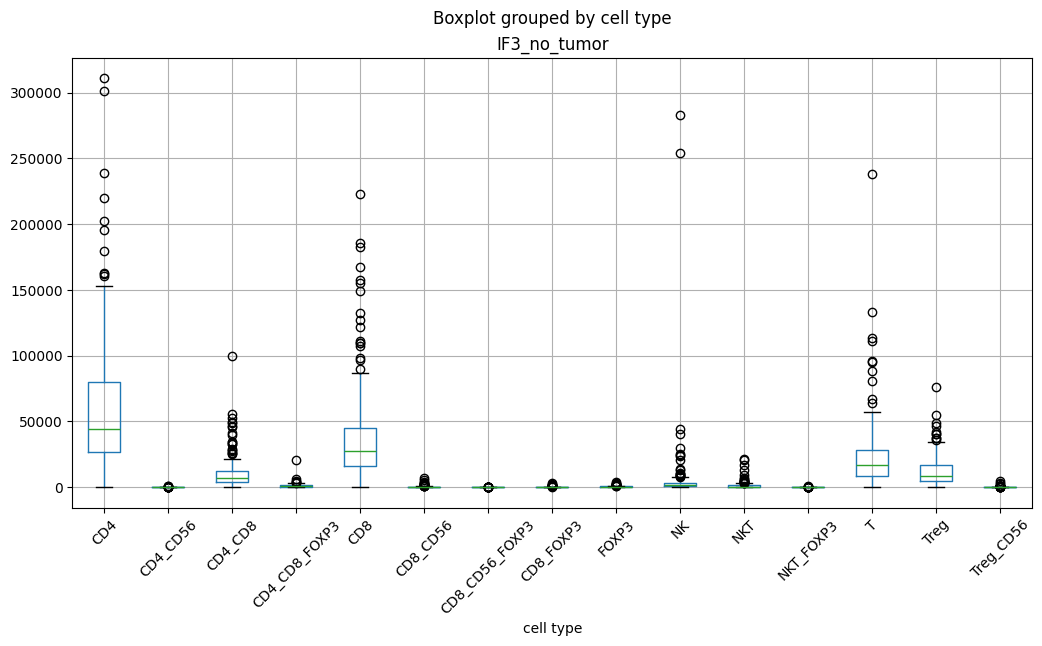

In [8]:
df3_edit=df3.drop(columns=[col for col in df3.columns if col.startswith('Tumor')])
df3_edit=df3_edit.drop(columns=['other'])
boxplots(df3_edit, "cell type", "IF3_no_tumor")

### Signatures

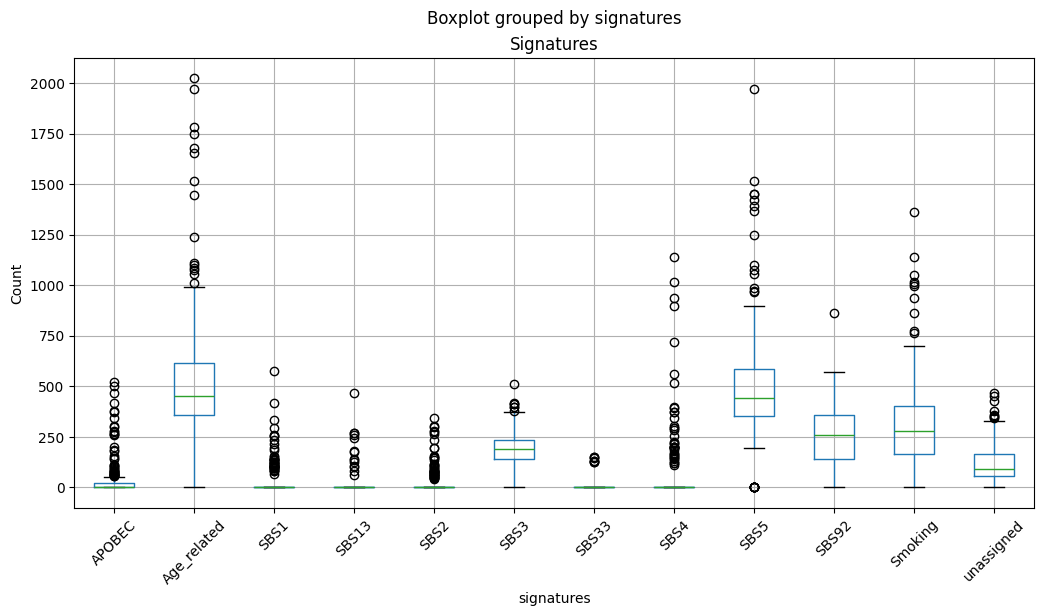

In [8]:
data_sig=r"data\Lung_NSCLC2.tsv"
df_sig=pd.read_csv(data_sig, sep='\t')
df_sig.drop(columns=['sample_vs_control', 'accuracy'], axis=1, inplace=True) # dropping columns

df_sig['Smoking']=df_sig['SBS4']+df_sig['SBS92']
df_sig['APOBEC']=df_sig['SBS2']+df_sig['SBS13']
df_sig['Age_related']=df_sig['SBS1']+df_sig['SBS5'] #poor quality
boxplots(df_sig, "signatures", "Signatures")

### Patient count of signatures

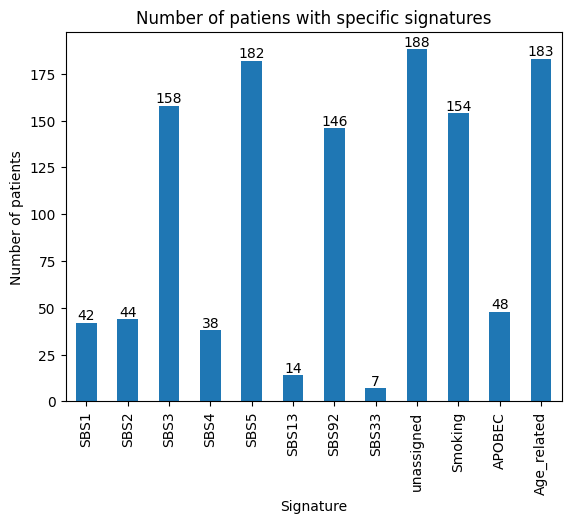

In [13]:
sig_counts=(df_sig.iloc[:, 1:]>0).sum() # counting where number of mutations is greater than 0

sig_counts_plot=sig_counts.plot.bar()
sig_counts_plot.bar_label(sig_counts_plot.containers[0]) # labaling bars
plt.title("Number of patiens with specific signatures")
plt.xlabel("Signature")
plt.ylabel("Number of patients")
plt.show()